In [1]:
%pylab
%matplotlib notebook

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
import json
import pandas as pd
import pydub
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr
from scipy.signal import correlate

In [31]:
def z(a):
    return a / np.max(a)

### JS Data

In [3]:
with open('coreo-1-js.json', 'r') as f:
    data = json.load(f)

In [4]:
data = pd.DataFrame(data)

In [5]:
bins = np.concatenate([np.linspace(0, 0.2, 50)])

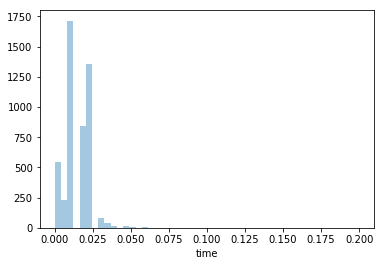

In [6]:
sns.distplot(data['time'].diff().dropna(), bins=bins, kde=False)

In [7]:
d = data['time'].diff()
print((1/d).describe())

count    4857.000000
mean             inf
std              NaN
min         0.793851
25%        43.066406
50%        86.132812
75%        86.132813
max              inf
Name: time, dtype: float64


### Comparison with audio

In [8]:
audio = pydub.AudioSegment.from_mp3('coreo-1.mp3')

In [9]:
audio.frame_count()

3309568.0

In [16]:
frames = np.array(audio.get_array_of_samples()).reshape((int(audio.frame_count()), audio.channels))

In [11]:
frame_rate = audio.frame_rate

In [13]:
cols = sns.color_palette()

In [18]:
%matplotlib notebook

<IPython.core.display.Javascript object>


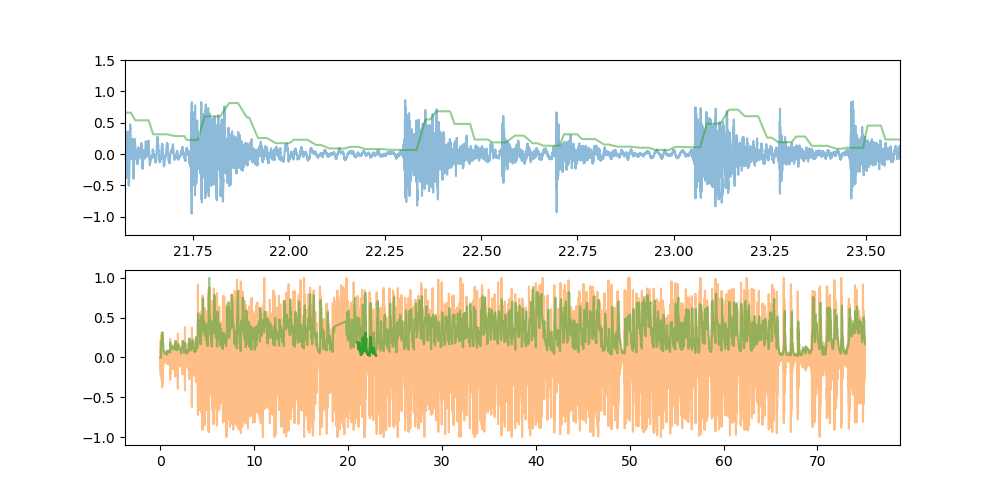

In [19]:
figure(figsize=(10, 5))
xs = np.arange(frames.shape[0]) / frame_rate
subplot(2, 1, 1)
plot(xs, frames[:, 0] / np.max(np.abs(frames[:, 0])), color=cols[0], alpha=.5)
plot(data['time'], data['level'] / data['level'].max(), color=cols[2], alpha=0.5)
subplot(2, 1, 2)
plot(xs, frames[:, 1] / np.max(np.abs(frames[:, 1])), color=cols[1], alpha=.5)
plot(data['time'], data['level'] / data['level'].max(), color=cols[2], alpha=0.5)

In [ ]:
plot(correlate(data['level'], np.abs(frames[:, 0])))

In [33]:
cut_xs = xs[(xs > 21) & (xs < 23)]
cut_frames = frames[(xs > 21) & (xs < 23), 0]

In [29]:
cut_data = data[(data['time'] > 21) & (data['time'] < 23)]

<IPython.core.display.Javascript object>


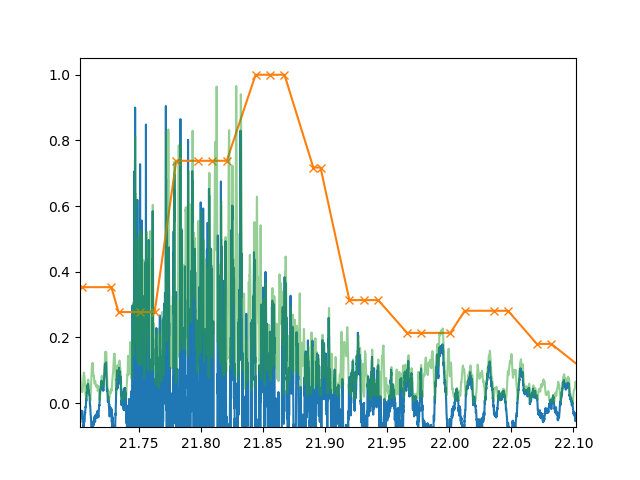

In [53]:
figure()
plot(cut_xs, z(cut_frames))
mean_fr = int(cut_data['time'].mean())
ma = np.convolve(np.abs(cut_frames), np.ones(mean_fr), 'valid') / mean_fr
plot(cut_data['time'], z(cut_data['level']), marker='x')
plot(cut_xs[mean_fr-1:], z(ma), alpha=.5)

In [ ]:
print(pearsonr(data['level'], frames[:, 0]))

In [ ]:
plot(data['time'], data['level'])

In [ ]:
frame_rate

In [ ]:
frames.shape